In [1]:
# Essential Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset from the spreadsheet
file_path = 'Kitchner_water_breaks.xlsx'  
data = pd.read_excel(file_path)

# Displaying basic information about the dataset to inspect it
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18906 entries, 0 to 18905
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Source.Name        18596 non-null  object        
 1   OBJECTID           18596 non-null  float64       
 2   WATMAINID          16045 non-null  float64       
 3   STATUS             16045 non-null  object        
 4   EXISTS             18906 non-null  int64         
 5   ASSET_EXIST        18595 non-null  object        
 6   PRESSURE_ZONE      16045 non-null  object        
 7   ROADSEGMENTID      16045 non-null  float64       
 8   CATEGORY           16045 non-null  object        
 9   PIPE_SIZE          18596 non-null  float64       
 10  MATERIAL           18596 non-null  object        
 11  LINED              16045 non-null  object        
 12  LINED_MATERIAL     16045 non-null  object        
 13  INSTALLATION_DATE  16045 non-null  datetime64[ns]
 14  INSTAL

In [3]:
# Encoding categorical variables
le = LabelEncoder()
data['MATERIAL'] = le.fit_transform(data['MATERIAL'])

# Select relevant features and target variable based on the PDF findings
features = ['EXISTS', 'AGE', 'CONDITION_SCORE', 'MATERIAL', 'PIPE_SIZE','INSTALLATION_YEAR']
target = 'FAILURE'  # 'FAILURE' is the target variable

X = data[features]
y = data[target]

In [4]:
print("Unique values in y:", y.unique())
print("Value counts in y:\n", y.value_counts())

Unique values in y: [0 1]
Value counts in y:
 FAILURE
0    16355
1     2551
Name: count, dtype: int64


In [5]:
# Train-Test Split, 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Debugging and cleaning X_train
print("Shape of X_train:", X_train.shape)

# Checking and handling missing values
print("Missing values in X_train:", np.isnan(X_train).sum())
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Check and handle infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Re-handle missing values after replacing infinite values
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Applying MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaling completed successfully.")

Shape of X_train: (14179, 6)
Missing values in X_train: 920
Infinite values in X_train: 0
Scaling completed successfully.


In [8]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsClassifier(n_neighbors=5)
reg.fit(X_train, y_train)
print("Test set R^2: {:.3f}".format(reg.score(X_test, y_test)))

#Cross Validation scores for KNN
scores = cross_val_score(knn, X_train, y_train)
print ("Cross-validation scores: {}".format(scores))

# Predictions and Evaluation
y_pred_knn = knn.predict(X_test)
print("KNN Evaluation:")
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Train Set Accuracy: {:.3f}".format(knn.score(X_train, y_train)))

Test set R^2: 0.997
Cross-validation scores: [0.99506347 0.99788434 0.9925952  0.99682652 0.99717813]
KNN Evaluation:
Test Set Accuracy:  0.9974613920033848
Train Set Accuracy: 0.997


In [9]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Cross Validation scores for KNN
scores = cross_val_score(log_reg, X_train, y_train)
print ("Cross-validation scores: {}".format(scores))

# Predictions and Evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Evaluation:")
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_log))
print("Train set Accuracy: {:.3f}".format(log_reg.score(X_train, y_train)))


Cross-validation scores: [0.96156559 0.96191819 0.96438646 0.9657969  0.9643739 ]
Logistic Regression Evaluation:
Test Set Accuracy: 0.9638248360482335
Train set Accuracy: 0.966


In [10]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

#Cross Validation scores for KNN
scores = cross_val_score(dt, X_train, y_train)
print ("Cross-validation scores: {}".format(scores))

# Predictions and Evaluation
y_pred_dt = dt.predict(X_test)
print("Decision Tree Evaluation:")
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Train set Accuracy: {:.3f}".format(dt.score(X_train, y_train)))

Cross-validation scores: [0.99012694 0.9925952  0.98695346 0.99012694 0.99329806]
Decision Tree Evaluation:
Test Set Accuracy: 0.9911148720118469
Train set Accuracy: 0.992


                 Model  Accuracy
0                  KNN  0.997461
1  Logistic Regression  0.963825
2        Decision Tree  0.991115


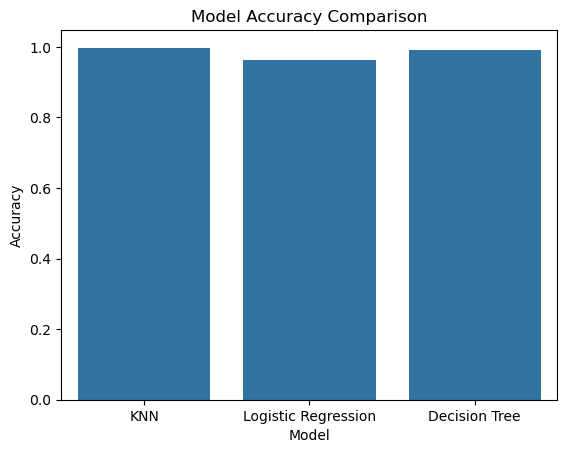

In [11]:
# Combine model results for comparison
results = {
    "Model": ["KNN", "Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plot the results
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for KNN:", knn_grid.best_params_)
best_knn = knn_grid.best_estimator_

# Evaluate on test set
y_pred_knn = best_knn.predict(X_test)
print("KNN GridSearchCV Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
KNN GridSearchCV Evaluation:
Accuracy: 0.9983075946689232


In [13]:
# Define parameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Decision Tree:", dt_grid.best_params_)
best_dt = dt_grid.best_estimator_

# Evaluate on test set
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree GridSearchCV Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree GridSearchCV Evaluation:
Accuracy: 1.0


In [ ]:
# Define parameter grid for Logistic Regression
log_reg_param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']},  # l1 with liblinear
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']},  # l2 with liblinear or saga
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.2, 0.5, 0.8]}  # elasticnet with saga
]

# Initialize GridSearchCV
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_param_grid, cv=5, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Logistic Regression:", log_reg_grid.best_params_)
best_log_reg = log_reg_grid.best_estimator_

# Evaluate on test set
y_pred_log = best_log_reg.predict(X_test)
print("Logistic Regression GridSearchCV Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))



In [ ]:
# Store results in a DataFrame
results = {
    "Model": ["KNN", "Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt)
    ],
    
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualize results
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy After Hyperparameter Tuning")
plt.show()

